What happens when you apply histogram equalization on your favorite grayscale image?

** Using Latex for generating PDF is mandatory.

In [1]:
import cv2
import matplotlib.pyplot as plt


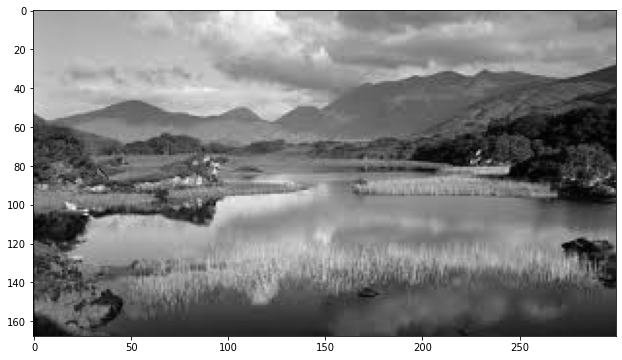

In [4]:
rgb_img = cv2.imread('village.jpeg')
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(14, 6))
plt.imshow(gray_img, cmap='gray')
plt.show()

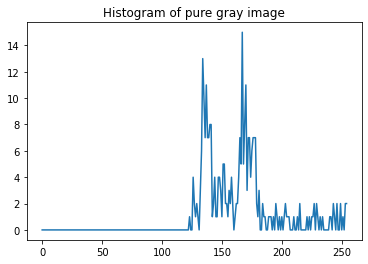

In [8]:
gray_hist = cv2.calcHist(gray_img, channels=[0], mask=None, histSize=[255], ranges=[0, 255])
plt.plot(gray_hist)
plt.title('Histogram of pure gray image')
plt.show()

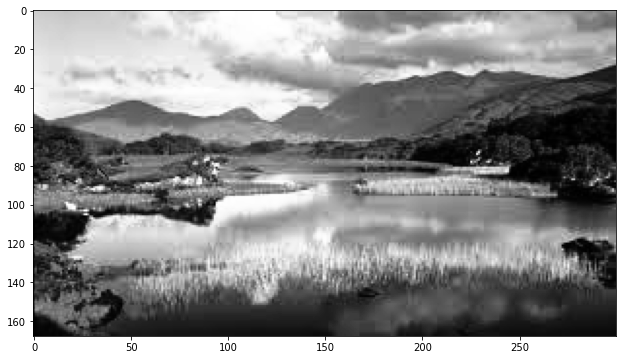

In [5]:
# histogram equalization
eq_gray_img = cv2.equalizeHist(gray_img)
plt.figure(figsize=(14, 6))
plt.imshow(eq_gray_img, cmap='gray')
plt.show()

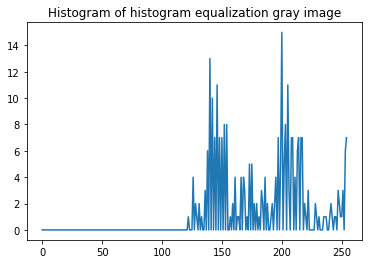

In [9]:
eq_gray_hist = cv2.calcHist(eq_gray_img, channels=[0], mask=None, histSize=[255], ranges=[0, 255])
plt.plot(eq_gray_hist)
plt.title('Histogram of histogram equalization gray image')
plt.show()

In [27]:
def display_img_n_hist(image, hist, title):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('gray Image')

    ax[1].plot(hist)
    ax[1].set_xlabel('pixels')
    ax[1].set_ylabel('intensity')
    ax[1].set_title('Histogram')
    plt.suptitle(title)
    plt.show()



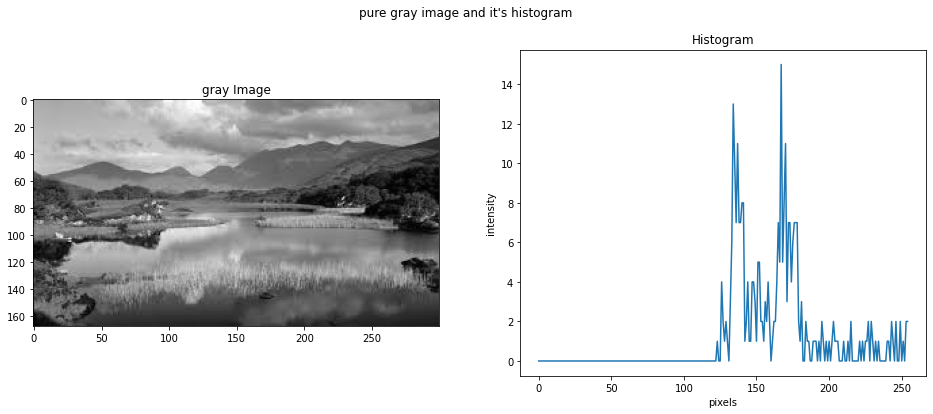

In [22]:
display_img_n_hist(gray_img, gray_hist, "pure gray image and it's histogram")

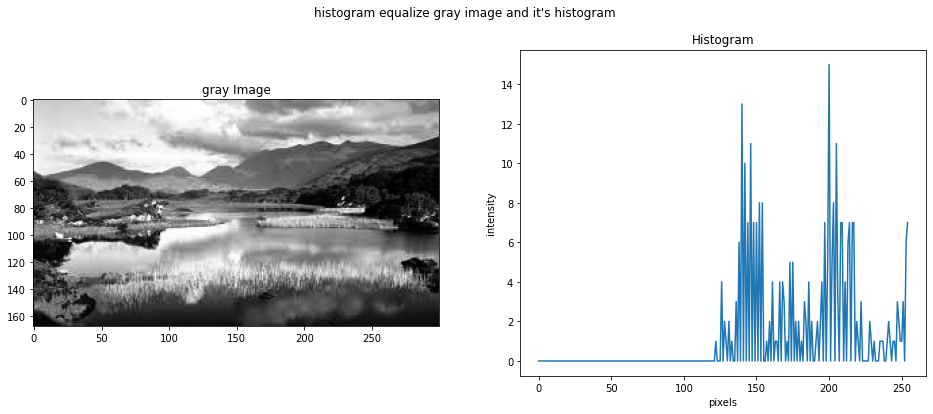

In [23]:
display_img_n_hist(eq_gray_img, eq_gray_hist, "histogram equalize gray image and it's histogram")

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [17]:
def histEqualizer(img_array):

    # step 1: Normalized commulative histogram
    ## flatten image array and calculate histogram via binning
    histogram_array = np.bincount(img_array.flatten(), minlength=256)

    ## normalize
    total_pixel = np.sum(histogram_array)
    # total_pixel = img_array.shape[0] * img_array.shape[1]

    histogram_array = histogram_array/total_pixel

    ## commulative histogram
    commulative_histogram = np.cumsum(histogram_array)

    # Step 2: Pixel mapping lookup table
    transform_map = np.floor(255 * commulative_histogram).astype(np.uint8)

    # step 3: Transformation
    ## flatten image array into 1D list
    img_list = list(img_array.flatten())

    ## transform pixel values to equalize
    eq_img_list = [transform_map[p] for p in img_list]

    ## reshape and write back into img array
    eq_img_array = np.reshape(np.array(eq_img_list), img_array.shape)

    return eq_img_array


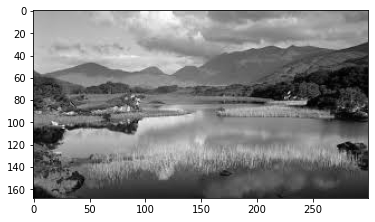

In [18]:
img = cv2.imread('village.jpeg')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img, cmap='gray')

[3.96825397e-05 3.57142857e-04 1.40873016e-03 2.16269841e-03
 4.02777778e-03 5.69444444e-03 7.67857143e-03 9.12698413e-03
 1.11904762e-02 1.33134921e-02 1.47420635e-02 1.63690476e-02
 1.78571429e-02 1.96626984e-02 2.11904762e-02 2.27777778e-02
 2.44642857e-02 2.61309524e-02 2.76587302e-02 2.97222222e-02
 3.12698413e-02 3.27380952e-02 3.42460317e-02 3.58134921e-02
 3.75992063e-02 3.89880952e-02 4.05952381e-02 4.24801587e-02
 4.42857143e-02 4.62301587e-02 4.80952381e-02 5.02579365e-02
 5.26587302e-02 5.50595238e-02 5.73015873e-02 6.04960317e-02
 6.31547619e-02 6.60317460e-02 6.94047619e-02 7.26388889e-02
 7.64285714e-02 7.98809524e-02 8.32738095e-02 8.61904762e-02
 8.99801587e-02 9.35515873e-02 9.70634921e-02 1.01269841e-01
 1.04722222e-01 1.08849206e-01 1.12480159e-01 1.15654762e-01
 1.19146825e-01 1.23154762e-01 1.26904762e-01 1.31527778e-01
 1.34781746e-01 1.39166667e-01 1.42916667e-01 1.47023810e-01
 1.51825397e-01 1.56250000e-01 1.61170635e-01 1.65376984e-01
 1.69603175e-01 1.743253

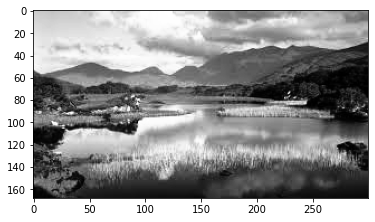

In [19]:
eq_img = histEqualizer(gray_img)
plt.imshow(eq_img, cmap='gray')
plt.show()

In [21]:
# histogram equilizer
def histogramEqualizer(img):

    # step 1: normalize commulative sum
    histArray = np.bincount(img.flatten(), minlength=256)

    totalpixel = np.sum(histArray)

    histArray = histArray / totalpixel

    cumHist = np.cumsum(histArray)

    # step 2: pixel mapping lookup table
    mapping_tab = np.floor(255 * cumHist).astype(np.uint8)

    # step 3: transformation and reshape and write back array
    imgList = list(img.flatten())

    eq_hist_img_list = [mapping_tab[p] for p in imgList]
    eq_hist_img_array = np.reshape(np.array(eq_hist_img_list), img.shape)

    return eq_hist_img_array

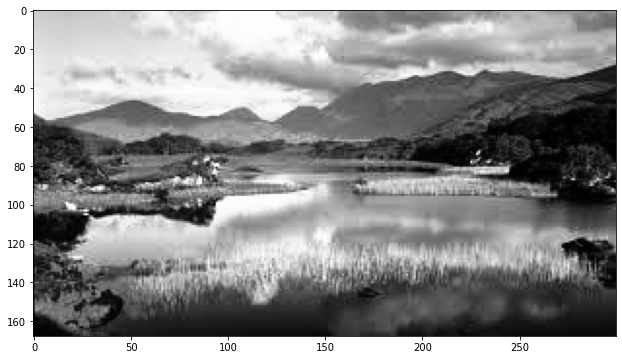

In [23]:
eq_img = histogramEqualizer(gray_img)
plt.figure(figsize=(14, 6))
plt.imshow(eq_img, cmap='gray')
plt.show()

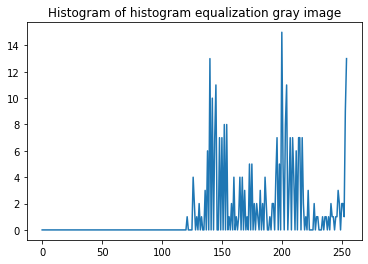

In [25]:
eq_hist = cv2.calcHist(eq_img, channels=[0], mask=None, histSize=[255], ranges=[0, 255])
plt.plot(eq_hist)
plt.title('Histogram of histogram equalization gray image')
plt.show()

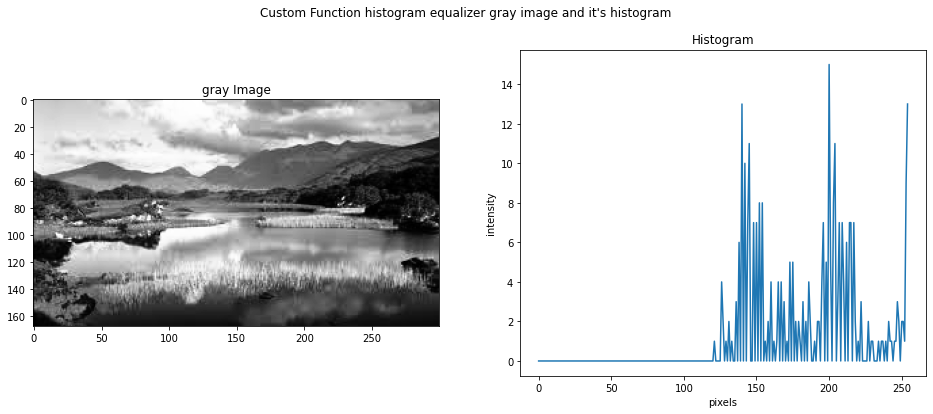

In [30]:
display_img_n_hist(eq_img, eq_hist, "Custom Function histogram equalizer gray image and it's histogram")